# script to graph opentuner database 

In [4]:
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from matplotlib.ticker import MaxNLocator
import os.path

def graph_data(db_name):
    BASE_DIR = os.path.abspath('') # os.path.dirname(__file__) NOT ok with .ipynb
    db_path = os.path.join(BASE_DIR, db_name)
    dbase = sqlite3.connect(db_path)
    cursor = dbase.cursor()
    cursor.execute(''' 
    SELECT id, time FROM result 
    ''')
    data = cursor.fetchall()
    ids = []
    times = []
    for row in data:
        ids.append(row[0])
        times.append(row[1])
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.plot(ids, times, '-+', label='exec. time', linewidth=1)
    plt.xlabel("ID")
    plt.ylabel("Time")
    plt.show()
    dbase.close()

In [5]:
from dateutil.parser import parse
a = parse("2021-12-08 00:28:21.125233")
b = parse("2021-12-08 00:22:51.756298")
print((a-b).seconds)

329


In [6]:
def graph_tuning(db_name):
    BASE_DIR = os.path.abspath('') # os.path.dirname(__file__) NOT ok with .ipynb
    db_path = os.path.join(BASE_DIR, db_name)
    dbase = sqlite3.connect(db_path)
    cursor = dbase.cursor()
    cursor.execute(''' 
    SELECT collection_date, time, was_new_best FROM result 
    ''')
    data = cursor.fetchall()
    tuning_times = []
    simulated_times = []
    flags = []
    base_date = parse(data[0][0])
    base_simulated_time = data[0][1]
    for row in data:
        diff = parse(row[0]) - base_date
        tuning_times.append(diff.seconds)
        if row[2] == 1:
            simulated_times.append(row[1])
            base_simulated_time = row[1]
        else:
            simulated_times.append(base_simulated_time)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.plot(tuning_times, simulated_times, '+', label='exec. time', linewidth=1)
    plt.xlabel("Tuning Time (s)")
    plt.ylabel("Execution Time (s)")
    plt.show()
    dbase.close()

# result of BT

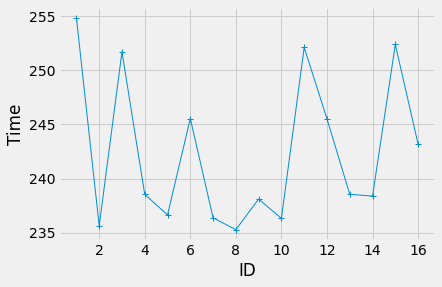

In [7]:
graph_data("calc5.bt.A.64.db")

# result of CG

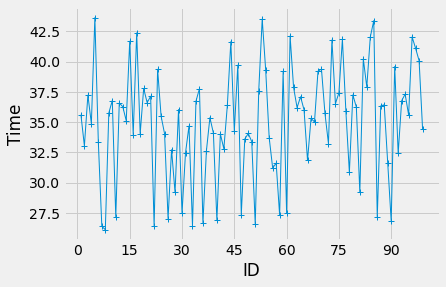

In [8]:
graph_data("calc5.cg.A.64.db")

# result of LU

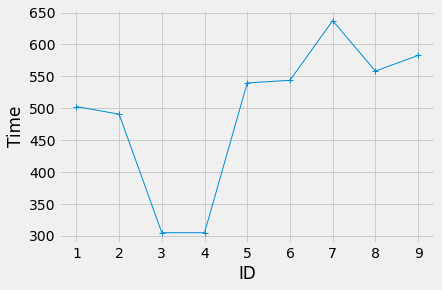

In [9]:
graph_data("calc5.lu.A.64.db")

# result of MG

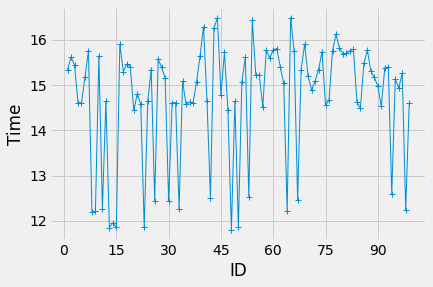

In [10]:
graph_data("calc5.mg.A.64.db")

# result of SP

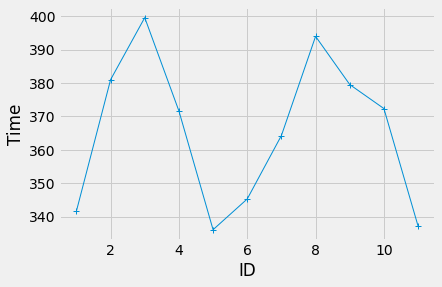

In [11]:
graph_data("calc5.sp.A.64.db")

# result of CG (exec. time vs. ID)

In [ ]:
graph_data("result.db")

# result of CG (exec. time vs. tuning time)

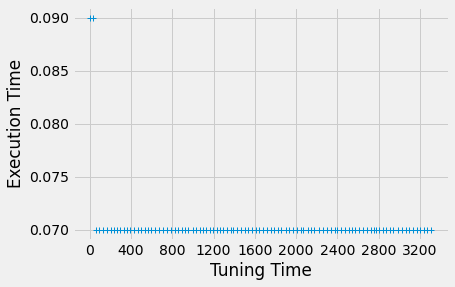

In [12]:
graph_tuning("result.db")